In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('white')
plt.rcParams['figure.figsize']=(12,6)

In [183]:
monday= pd.read_csv('data/monday.csv', sep=';')
monday['timestamp']=pd.to_datetime(monday['timestamp'])
monday

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [243]:
customer_7=monday.loc[monday.customer_no == 7].set_index('timestamp')
customer_7=customer_7.resample('T').asfreq().ffill()
customer_7

,customer_no,location
timestamp,,
2019-09-02 07:04:00,7.0,spices
2019-09-02 07:05:00,7.0,drinks
2019-09-02 07:06:00,7.0,drinks
2019-09-02 07:07:00,7.0,drinks
2019-09-02 07:08:00,7.0,drinks
2019-09-02 07:09:00,7.0,spices
2019-09-02 07:10:00,7.0,spices
2019-09-02 07:11:00,7.0,fruit
2019-09-02 07:12:00,7.0,fruit


In [255]:
monday_filled  = monday.set_index('timestamp')
monday_filled

for customer in monday_filled['customer_no'].values:
    df_customer=monday_filled.loc(monday_filled.customer_no == customer)
    df_customer.resample('T').asfreq().ffill()


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [236]:
monday6 = monday.groupby(['timestamp', 'location']).count()
monday6= monday6.reset_index()
monday6.rename(columns = {'customer_no':'current_customers'}, inplace = True) 
monday6['time'] = monday6['timestamp'].dt.time
monday6['current_customers'].value_counts()

1    1476
2     806
3     342
4     114
5      44
6      11
7       4
Name: current_customers, dtype: int64

In [235]:
monday_dairy=monday6.loc[monday6['location']=='dairy']
monday_dairy = monday_dairy[['time', 'current_customers']]
monday_dairy
#monday_dairy.set_index('time', inplace=True)
#sns.countplot(x=monday_dairy['time'],data=monday_dairy)

,time,current_customers
0,07:03:00,2
1,07:04:00,2
5,07:05:00,1
8,07:06:00,2
13,07:07:00,1
...,...,...
2773,21:42:00,1
2785,21:47:00,2
2788,21:48:00,2
2792,21:49:00,1


TypeError: float() argument must be a string or a number, not 'datetime.time'

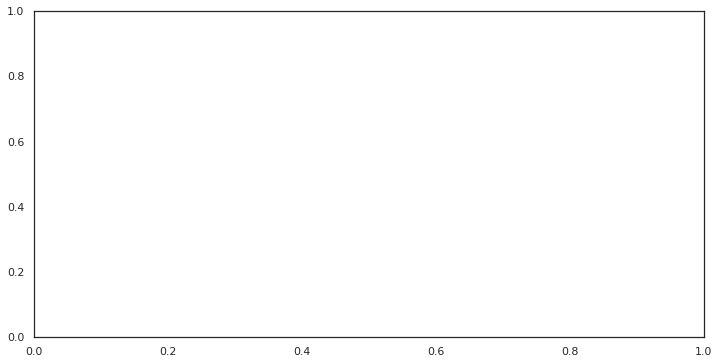

TypeError: float() argument must be a string or a number, not 'datetime.time'

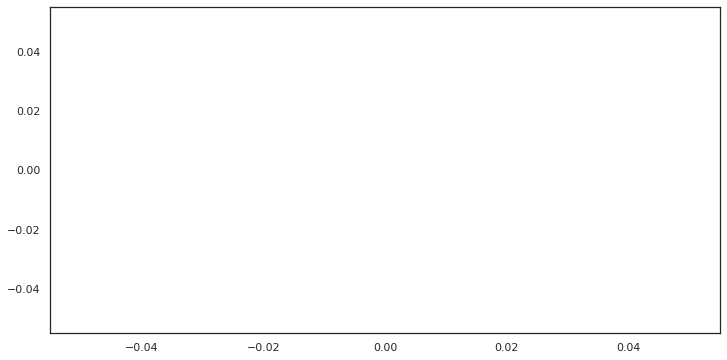

In [204]:
sns.scatterplot(x=monday6['time'], y=monday6['current_customers'], hue=monday6['location'])

In [131]:
monday5 = monday.set_index('timestamp')


In [109]:
#monday['dummy']=1
monday.location.value_counts()


checkout    1437
fruit       1005
dairy        895
drinks       797
spices       750
Name: location, dtype: int64

In [127]:
#monday['location_num']=monday.location.astype('category').cat.codes
#monday

In [185]:
#monday2=monday.groupby(['customer_no', 'timestamp', 'location'])['location_num'].mean().unstack()
#monday2=monday.groupby(['customer_no', 'timestamp', 'location']).count()
#monday2

In [186]:
monday4=monday2.reset_index().set_index('customer_no')

monday4

,timestamp,location
customer_no,,
1,2019-09-02 07:03:00,dairy
1,2019-09-02 07:05:00,checkout
2,2019-09-02 07:03:00,dairy
2,2019-09-02 07:06:00,checkout
3,2019-09-02 07:04:00,dairy
...,...,...
1444,2019-09-02 21:48:00,spices
1444,2019-09-02 21:49:00,checkout
1445,2019-09-02 21:49:00,dairy


In [126]:
#monday2[['dairy', 'drinks', 'fruit', 'spices', 'checkout']]

In [98]:
#monday3 = monday2.reset_index('timestamp')
#monday3 = monday3[['timestamp','dairy', 'drinks', 'fruit', 'spices', 'checkout']]
#monday3['location_code']=monday3(sum(['dairy', 'drinks', 'fruit', 'spices', 'checkout']))

In [125]:
#monday3.reset_index().set_index('customer_no')

In [123]:
monday4['dummy']=1

In [124]:
monday4.groupby(['timestamp', 'location']).count()

dummy
timestamp           location       
2019-09-02 07:03:00 dairy         2
2019-09-02 07:04:00 dairy         2
                    fruit         1
                    spices        3
2019-09-02 07:05:00 checkout      2
...                             ...
2019-09-02 21:49:00 dairy         1
                    fruit         2
                    spices        2
2019-09-02 21:50:00 dairy         1
                    fruit         1

[2797 rows x 1 columns]

In [180]:
monday7 = monday6.reset_index().set_index('timestamp')
monday7

,location,customer_no
timestamp,,
2019-09-02 07:03:00,dairy,2
2019-09-02 07:04:00,dairy,2
2019-09-02 07:04:00,fruit,1
2019-09-02 07:04:00,spices,3
2019-09-02 07:05:00,checkout,2
...,...,...
2019-09-02 21:49:00,dairy,1
2019-09-02 21:49:00,fruit,2
2019-09-02 21:49:00,spices,2


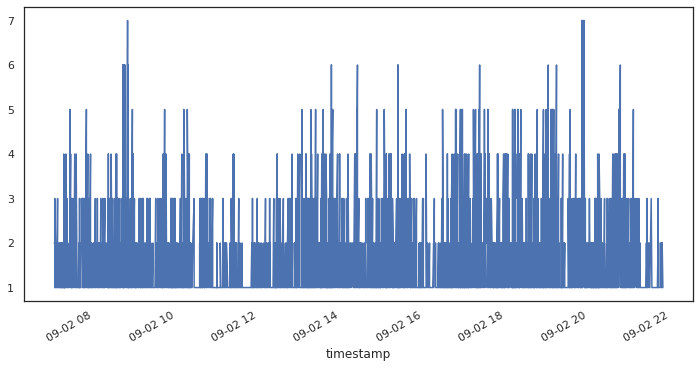

In [181]:
monday7['customer_no'].plot()

In [179]:
#monday7=monday7.reset_index()


,level_0,timestamp,location,customer_no
0,0,2019-09-02 07:03:00,dairy,2
1,1,2019-09-02 07:04:00,dairy,2
2,2,2019-09-02 07:04:00,fruit,1
3,3,2019-09-02 07:04:00,spices,3
4,4,2019-09-02 07:05:00,checkout,2
...,...,...,...,...
2792,2792,2019-09-02 21:49:00,dairy,1
2793,2793,2019-09-02 21:49:00,fruit,2
2794,2794,2019-09-02 21:49:00,spices,2
2795,2795,2019-09-02 21:50:00,dairy,1


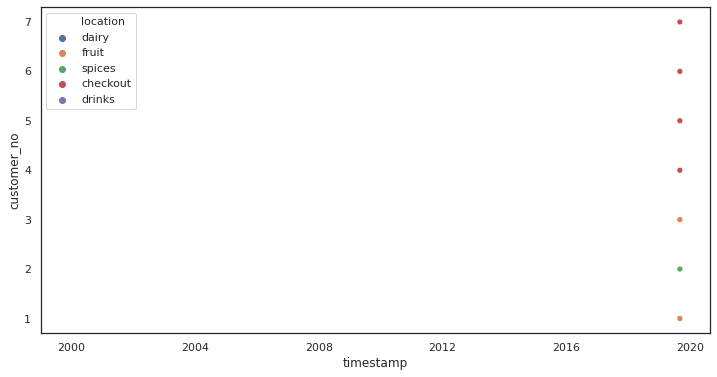

In [174]:
sns.scatterplot(x=monday7['timestamp'], y=monday7['customer_no'], data=monday7, hue='location')